In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("signal.csv")

In [16]:
df.head()

,Index,Filtered Signal,Original Signal
0,0,95.053638,21.239311
1,1,102.178662,21.239311
2,2,105.972948,21.239311
3,3,105.170405,130.601295
4,4,102.186586,180.000000


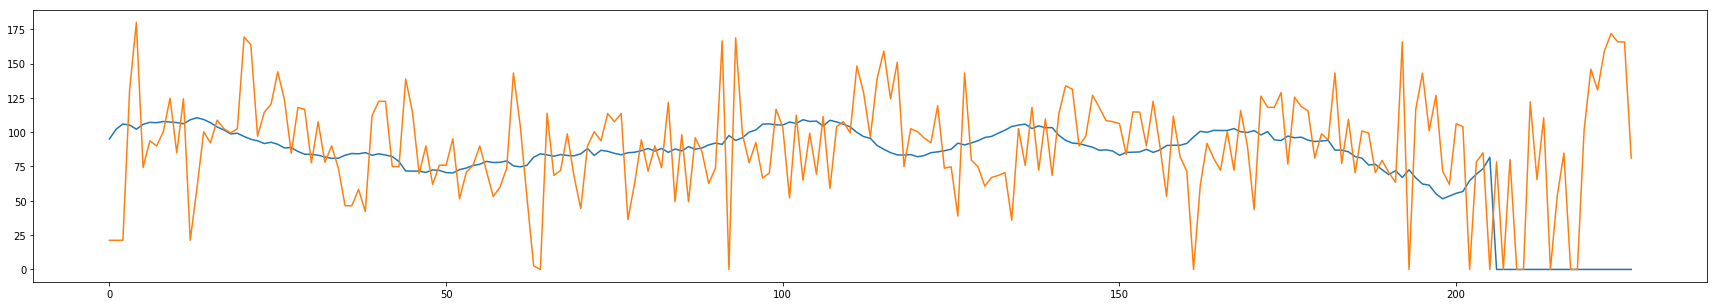

In [23]:
plt.figure(figsize=(30,5))
plt.plot(df.iloc[:, 0], df.iloc[:, 1])
plt.plot(df.iloc[:, 0], df.iloc[:, 2])
plt.savefig("iOS_signal")